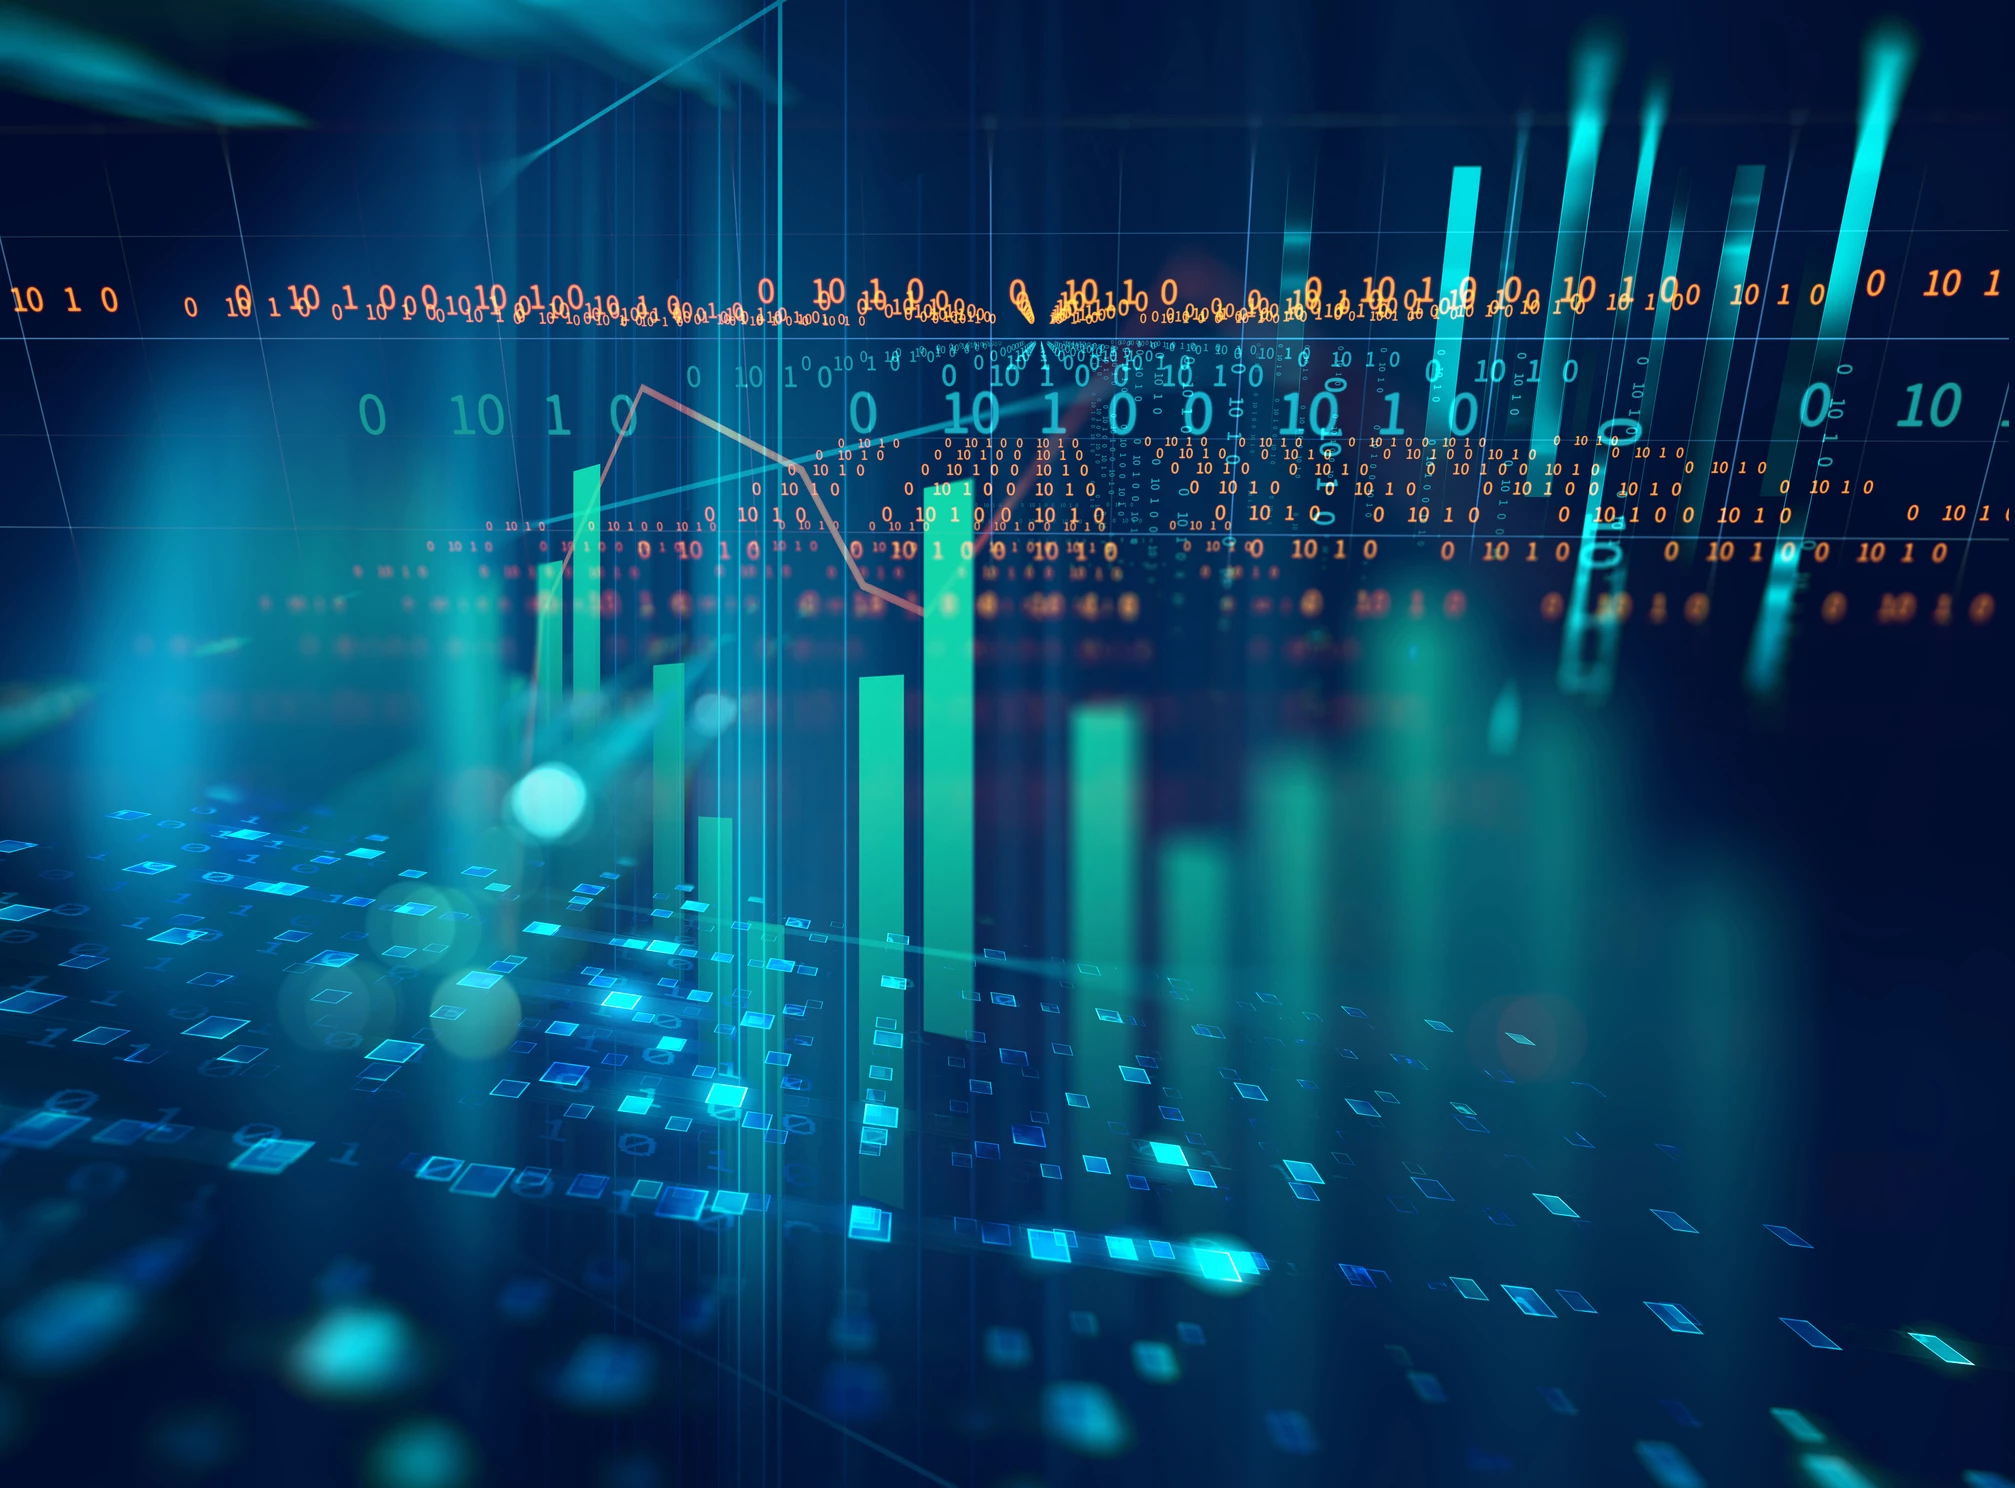

#  PROJECT DATA SCIENCE RISK ANALYSIS BANK

Ótimo dia!!! Tudo bem? Me chamo João e irei explicar brevemente um projeto de prevenção e análise de riscos para recebimento de crédito de um banco. Agora que já me apresentei, VAMOS AO CÓDIGO!!!

Bom, primeiramente, o que vamos usar será uma análise usando um método de árvore de decisão do sklearn. O código é feito em Python e tem como objetivo receber informações de novos clientes e classificá-los como um risco baixo, moderado ou alto para o atendimento do empréstimo bancário. Usaremos uma base de dados menor nesse projeto para ter mais facilidade em explicar o conteúdo e tornar a apresentação mais dinâmica.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
import pickle
from matplotlib import pyplot as plt


Primeiramente, importamos algumas bibliotecas que iremos usar para o aprendizado de máquina, visualização de gráficos e importação de base de dados.

In [ ]:
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

Após isso, pegaremos duas bases de dados: uma com os dados previsores (x) e outra com o risco (y)

In [15]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

Nisso, definimos nossa árvore de risco e usaremos o critério 'entropy', que significa entropia e é usado para criar uma base de dados mais homogênea e balanceada. Passamos o parâmetro para medir a impureza da base de dados. Quanto menor a 'entropia', mais organizados são os dados.

In [ ]:
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

Agora, iremos treinar nosso algoritmo usando as duas classes: previsores e risco.

In [12]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

Vemos que os dados já estão convertidos em array, pois já foram pré-processados. Como se trata de uma base de dados pequena, 
fica mais fácil de entender os dados.

In [13]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

E aqui temos nossas taxas de risco

In [17]:
arvore_risco_credito.feature_importances_ 

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

Retornamos a importancia de cada um dos atributos
O primeiro é o historico de credito
O segundo é a divida
O terceiro é a garantia
O quarto é a renda


[Text(0.5555555555555556, 0.9166666666666666, 'x[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.3333333333333333, 0.75, 'x[0] <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.25, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5555555555555556, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.

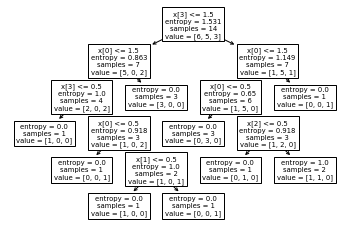

In [19]:
tree.plot_tree(arvore_risco_credito)

Aqui temos nossa arvore de decisão porem como esta 'pura' acaba ficando muito complicado de ler então vamos melhorar nossa visuzalização

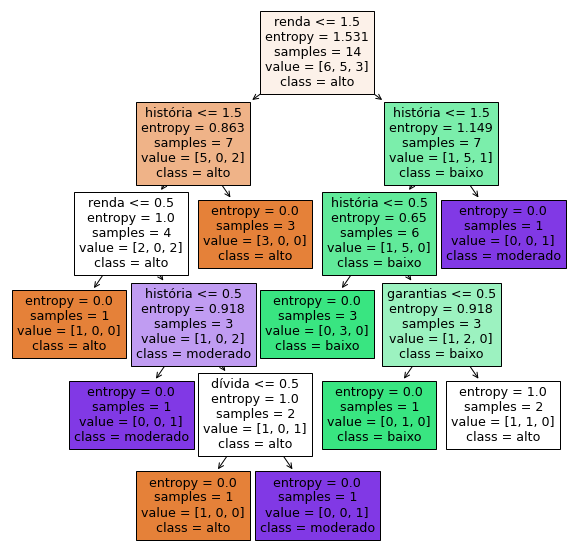

In [30]:
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,10)); 
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

Vemos que agora, após melhorar as imagens e nomear os atributos usados, ficou muito mais simples de entender como funciona a árvore de decisão e como ela chega a cada resultado.

Agora, podemos tentar usar esse algoritmo para descobrir, com base na história, dívida, garantia e renda de uma pessoa, qual seria seu risco de crédito no banco. Para isso, vamos usar dois exemplos:

1 - História: boa, dívida: alta, garantia: nenhuma, renda > 35.

2 - História: ruim, dívida: alta, garantia: adequada, renda < 15.

Vamos passar essas informações em formato de número para a máquina, porém equivalente a esses atributos. O resultado correto seria:

1 - Risco baixo.
2 - Risco alto.

In [34]:
previsoes = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

Usamos o .predict para medir valores de acordo com o algoritmo após ser treinado

In [45]:
print('\033[92m' + 'O risco de credito do primeiro potencial cliente é {} e o risco de credito do segundo potencial cliente é {}'.format(previsoes[0], previsoes[1]) + '\033[0m')

O risco de credito do primeiro potencial cliente é baixo e o risco de credito do segundo potencial cliente é alto


O resultado do projeto mostra a importância do uso de técnicas de análise de risco para o recebimento de crédito em um banco, permitindo a classificação de potenciais clientes em riscos baixos, moderados e altos. Com essa análise, o banco pode tomar decisões mais informadas e reduzir os riscos de inadimplência.

Com isso, concluímos este projeto de prevenção e análise de riscos para recebimento de crédito de um banco, esperando ter contribuído para o entendimento da importância da análise de risco em instituições financeiras e das técnicas utilizadas para sua realização.